# (Dataset Exploration FOR TITANIC DATASET)
## by (Hassan Ali)


>this data set contains information about each passenger that they were on the titanic ship information like (sex, name,.. )
and if the passenger survived or not we will investigate what the most gender survived and the most port passenger embarked from and what other feature related to these passenger form this port like the most gender survived the most common age and most common family size

# TABLE OF CONTENT
**1.DATA CLEANING AND WRANGLING**
* 1.1LOAD THE DATA SET
* 1.2 MERGE THE TWO DATAFRAME
* 1.3 CHEACK FOR NAN VALUE
* 1.4 DEALING WITH NAN VALUE
* 1.5 FEATURE ENGINEERING AND ENCODING
  * 1.5.1 FEATURE ENGINEERING (FAMILY COLUMN)
  * 1.5.2 FEATURE ENCODING FOR SURVIVIED COLUMN
  
**2.WHAT IS THE MOST SURVIVED GENDER?**
* 2.1 UNIVARIATE EXPLORATION 
  * 2.1.1 SURVIVED FEATURE PLOT
  * 2.1.2 SEX FEATURE PLOT
* 2.2 BIVARIATE EXPLORATION
  * 2.2.1 HEAT MAP AND CLUSTERED PLOT FOR SEX VS SURVIVED
  
**3..WHAT IS THE MOST COMMON PORT FOR THE FEMALE OR MALE PASSENGER THAT THEY EMBARKED FROM, WITH RESPECT TO THE PEOPLE WHO SURVIVE AND DID NOT SURVIVE?**
* 3.1 UNIVARIATE EXPLORATION 
* 3.2 BIVARIATE EXPLORATION 
  * 3.2.1 EMBARKED VS SEX
* 3.3 MULTIVARIATE EXPLORATION
  * 3.3.1 WHAT IS THE MOST COMMON GENDER FOR PASSENGER THAT SURVIVED AND DID NOT SURVIVE WITH RESPECT TO HE/SHE DID EMBARK FROM S-SOUTHAMPTON?
  * 3.3.2 WHAT IS THE MOST COMMON AGE FOR THE FEMALE/MALE PASSENGER THAT SURVIVED AND DID NOT SURVIVE WITH RESPECT TO HE/SHE DID EMBARK FROM S-SOUTHAMPTON ? 
    * 3.3.2.1 Sex vs Survived=(survived ) vs Embarked vs Age 
    * 3.3.2.2 Sex vs Survived=(didn't survive ) vs Embarked vs Age
* 3.4  WHAT IS THE MOST COMMON FAMILY NUMBER FOR THE FEMALE/MALE PASSENGER THAT SURVIVED AND DID NOT SURVIVE WITH RESPECT TO IF HE/SHE DID EMBARK FROM S-SOUTHAMPTON PORT?**

**4.CONCLUSION**

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

 # 1.DATA CLEANING AND WRANGLING
at this section we will load the dataset and prepare it for the expolration 


## 1.1LOAD THE DATA SET
our source for the data provide us with 2 data frame (train, test) for the same dataset, so we will merge them to create the data frame for the exploration process 

In [3]:
#load the train ,test
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

#assieng Survived column to the test data to be the saem as the train
test_survived=pd.read_csv("gender_submission.csv")
test["Survived"]=test_survived["Survived"]

row,col=train.shape
print(f"the train set contain rows=={row},columns={col}")
row,col=test.shape
print(f"the test set contain rows=={row},columns={col}")


the train set contain rows==891,columns=12
the test set contain rows==418,columns=12


>**observation** the number of columns is the same and the number of rows is different because it is separated data frame for the same data set 

## 1.2 MERGE THE TWO DATAFRAME


In [4]:
frames = [test,train]

df = pd.concat(frames,ignore_index=False) #a new data frame with train and test merged together



## 1.3 CHEACK FOR NAN VALUE


In [5]:
df.shape #see the shape of our data frame

(1309, 12)

In [6]:
df.isnull().sum()# check for the null value in each column


PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

>**observation**<br>
* the null values are in Capin ,Age,Emparked columns<br>
* we will drop the Cabin column and the rows that contains null value for Age, Embarked          

## 1.4 DEALING WITH NAN VALUE


In [7]:
#drop the Cabin column
df.drop("Cabin",inplace=True,axis=1)

#drop the the rows that is contain the NaN valur for age ,Emparked
df_final=df.dropna()

#cheack for null value again
df_final.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

## 1.5 FEATURE ENGINEERING AND ENCODING 
we will create a new feature and it is the sum of SibSp + Parch  and it will indicate to the family size that was on the ship  
and encode the Survived column to 0 to didn't survive,1 to survive

### 1.5.1 FEATURE ENGINEERING (FAMILY COLUMN)

In [8]:
df_final.SibSp.unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [9]:
df_final.Parch.unique()

array([0, 1, 3, 2, 4, 6, 5], dtype=int64)

**observation**<br>
in both columns `0` means the passenger is alone on the ship <br>
when we create the new column we will add `1` to give indicate to that passenger is only one from his family on this ship <br>
and if it `2` that means he and one of his family members are on the ship and the same goes from 3 or 4,...

In [10]:
df_final["Family"]=df_final["SibSp"]+df_final["Parch"]+1

C:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
#check the shape after adding the new column 
df_final.shape

(1043, 12)

In [12]:
#show the first 5 rows of the final data
df_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,3


### 1.5.2 FEATURE ENCODING FOR SURVIVIED COLUMN

In [13]:
df_final["Survived"]=df_final["Survived"].map({0:"didn't survive",1:"survived"})
#cheack for it in the data frame
df_final.head()

C:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,didn't survive,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,survived,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,didn't survive,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,didn't survive,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,survived,3


### What is the structure of your dataset?

> my data contain 1043 rows , 12 columns after adding the Family column 

### What is/are the main feature(s) of interest in your dataset?

>  the survived ,  Embarked columns we want to know what the information of  feature is related to  the people who survived and did not survive  information like <br>
* what is the most survived gender<br>
* the most common port for the female or male passenger that emparked from, with respect to the people who survive and did not survive<br>
* the most common age and family size for the female/male passenger that survived and did not survive with respect to the most embarked from port <br>
      

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>, Sex  ,Age ,Family columns     

# 2 WHAT IS THE MOST SURVIVED GENDER?
to answer this qustion we will use  Univariate and pivariate Exploration

##  2.1 UNIVARIATE EXPLORATION 
plot each feature on each own Sex , Survived columns 

In [14]:
def uni_count_plot (df,column,title):
    df=df
    column_counts_index=df[column].value_counts().index #the sorted index for the counted unique value in survived column
    column_counts_counts=df[column].value_counts()#the sorted counted unique value in survived column
    plt.figure(figsize=[10,10])
    sb.countplot(data=df,x=column,order=column_counts_index)
    for i,count in enumerate(column_counts_counts):
        mean=f" the percentage={round(100*(count/len(df_final)))}%"
        #count=f"{int(count)}"
        props = dict(boxstyle='square', facecolor='white', alpha=0.5)
        plt.text(x=i,y=count,s=mean,horizontalalignment='center' , verticalalignment="bottom",fontsize=14)
        plt.text(x=i,y=count/2,s=f"count={count}",horizontalalignment='center' ,bbox=props,fontsize=14)

    plt.title(title)
    
    '''this function will take the desired data frame and column name 
    to draw a count plot for the unique value (sorted from the most repeated to the least one) of this column 
    , the plot will have information like how many time each unique value in this column repeated (count),
    and the percentage of each one, also it will take title to put it as the title for the figure'''


### 2.1.1 SURVIVED FEATURE PLOT

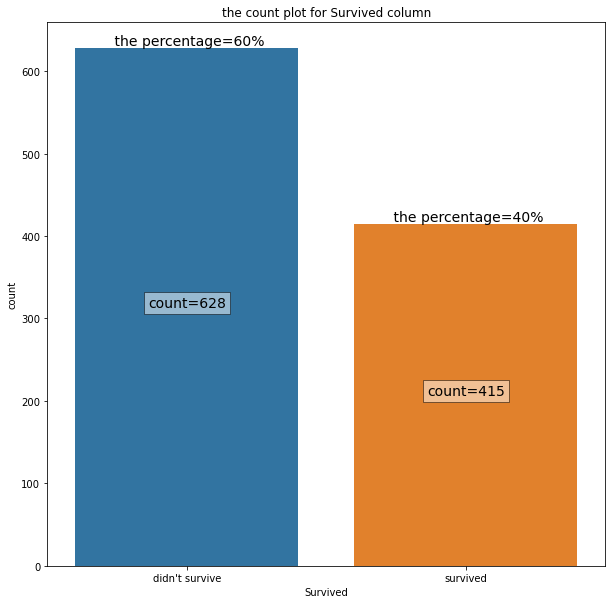

In [15]:
uni_count_plot (df_final,"Survived","the count plot for Survived column")


>**observation** we can say that 
* 60% from out data did not survive 
* 40% did survive

### 2.1.2 SEX FEATURE PLOT

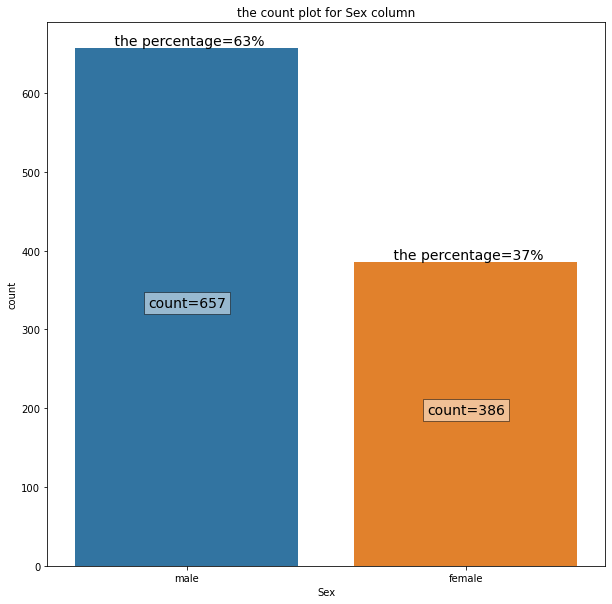

In [16]:
uni_count_plot (df_final,"Sex","the count plot for Sex column")


>**observation** we can say that 
* 63% from our dataset is male 
* 37% is female

## 2.2 BIVARIATE EXPLORATION
In this section, we will see the relation between the Sex column and Survived column in one graph using Bivariate exploration

In [17]:
def heat_map_2_catag_vlaue(cat_val1,cat_val2,df):
    plt.figure(figsize=[10,10])
    counts = df.groupby(cat_val1)[cat_val2].value_counts()
    counts_df = counts.reset_index(name='count')
    counts_df = counts_df.pivot(index = cat_val1, columns = cat_val2, values = 'count')
    sb.heatmap(counts_df, annot = True, fmt = 'd')
    
    '''This function we will be used to get the heat value of two categorical value and 
       also it will print on every geat segment the count of the point at this area takes 
       the  categorical columns name and the datafeam as input'''

In [18]:
def count_plot_2_catag_vlue(cat_val1,cat_val2,df,box):
    df1 = df.groupby([cat_val1, cat_val2]).size()
    df1 = df1.reset_index(name='count')
    g = sb.catplot(x=cat_val1,y='count',hue=cat_val2,kind='bar',data=df1,alpha=0.8)
    for p in g.ax.patches:
        txt_x = p.get_x() 
        txt_y = p.get_height()
        props = dict(boxstyle='square', facecolor='none', alpha=0.5)
        mean= f"{round(p.get_height()/len(df_final)*100,1)}%"
        if box==True:
            g.ax.text(txt_x+0.06,txt_y/10,f"{int(p.get_height())}",horizontalalignment='left' , verticalalignment="bottom",fontsize=13,bbox=props)
            g.ax.text(x=txt_x+0.06,y=txt_y,s=mean,horizontalalignment='left' , verticalalignment="bottom",fontsize=13)
        else:
            g.ax.text(txt_x+0.06,txt_y/10,f"{int(p.get_height())}",horizontalalignment='left' , verticalalignment="bottom",fontsize=13)
            g.ax.text(x=txt_x+0.06,y=txt_y,s=mean,horizontalalignment='left' , verticalalignment="bottom",fontsize=13)
        
    plt.title(f"{cat_val1} vs {cat_val2} CLUSTERED PLOT ")

    '''This function we will be used to get the clustered bar chart  of two categorical value 
        and also it will print on every bar  the count and the percentage of each unique value 
        in the two columns,
           
        the box is bool value if it ==True the count will be printed on the bar inside squar box
        if it False the count value will be printed normaly on the bar '''
    
    #https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
    #this code helped to get the hight of each bar and to iterate between the bars

### 2.2.1 HEAT MAP AND CLUSTERED PLOT FOR SEX VS SURVIVED

<Figure size 720x720 with 0 Axes>

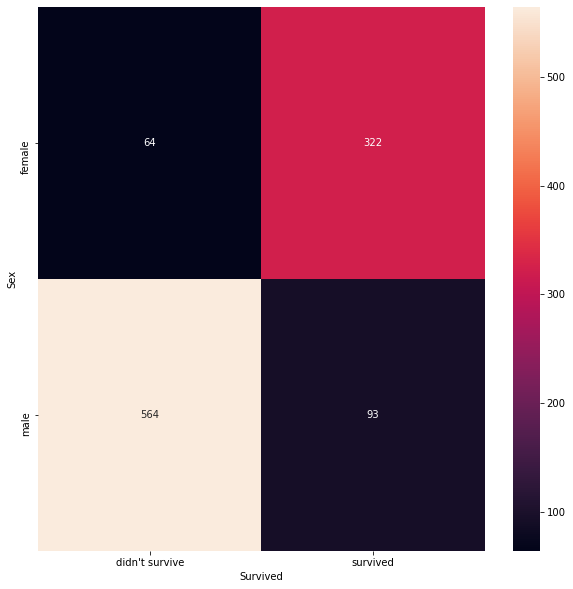

In [19]:
#heat map
plt.figure(figsize=[10,10]);
heat_map_2_catag_vlaue("Sex","Survived",df_final);


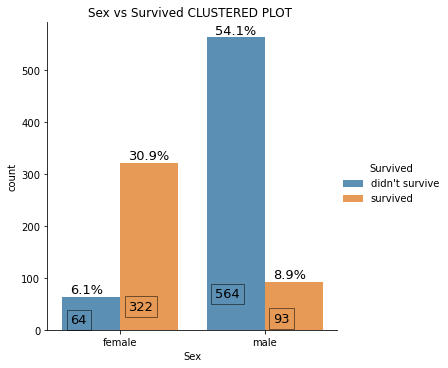

In [20]:
#clustred plot
count_plot_2_catag_vlue("Sex","Survived",df_final,box=True)

>**observation** we can say that form the heatmap and the clustredber 
* from 386 female 
  * 64 &emsp; did not survive &emsp; 6% from the original data
  * 322&emsp;did survive      &emsp;&emsp;&emsp;31% from the original data
* from 657 male
  * 564&emsp;did not survive  &emsp; 54% from the original data
  * 93 &emsp; did survive     &emsp;&emsp;&emsp;9 % from the original data

 >**general conclusion**<br>
<br>
* 63% from our data were male passenger and 54% form our data were male and did not survive <br>
* 63% from our data were male passenger and 9%  form our data were male and did survive <br>
<br>
<br>
* 37% from our data were female passenger and 6% form our data were male and did not survive <br>
* 37% from our data were female passenger and 31%  form our data were male and did survive <br>
<br>

><br>**we can say that most survived gender is female**<br>
**we can say that most most gender that did not survive is male** <br>
**Furthermore, half of our data were men and did not survive with percentage =54%** <br>


# 3.WHAT IS THE MOST COMMON PORT FOR THE FEMALE OR MALE PASSENGER THAT THEY EMBARKED FROM, WITH RESPECT TO THE PEOPLE WHO SURVIVE AND DID NOT SURVIVE?<br>

in this section we will use univariate, Bivariate, multivariate to see the relation between the  sex, emparked and Survived columns 


## 3.1 UNIVARIATE EXPLORATION 
plot each feature on each own Embarked the sex and survived column plotted in the prevoius section <br>
since the Emparked column is a categorical value we can use a bar plot for it so we will use the implemented function
`uni_count_plot`

Text(1.7, 600, 'Q-Queenstown port')

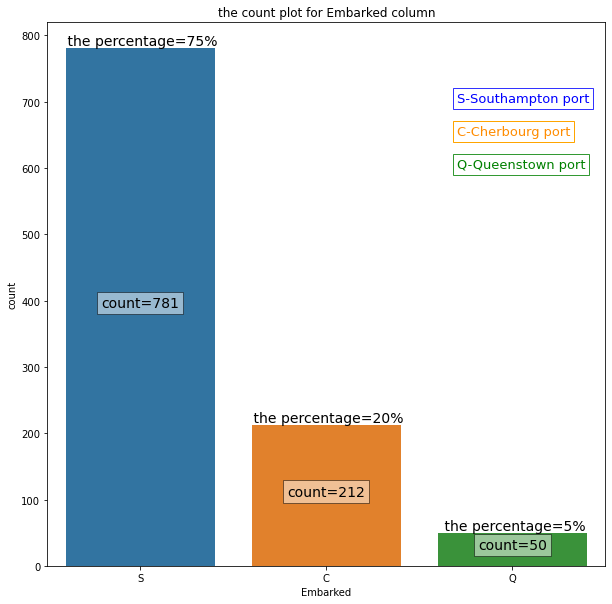

In [21]:
#plot the countplo
uni_count_plot (df_final,"Embarked","the count plot for Embarked column")
# crete legend 
Q="Q-Queenstown port"
S="S-Southampton port"
C="C-Cherbourg port"
#make the coloredge for each box to be the same as the (C,S,Q) in the countplot
props_g = dict(boxstyle='square', facecolor='none', edgecolor='green', alpha=0.8)
props_b = dict(boxstyle='square', facecolor='none', edgecolor='blue', alpha=0.8)
props_o = dict(boxstyle='square', facecolor='none', edgecolor='orange', alpha=1)

#place the the box with the text inside it sorted the same way as the countplot
plt.text(x=1.7,y=700,s=S,fontsize=13,bbox=props_b,color="blue")
plt.text(x=1.7,y=650,s=C,fontsize=13,bbox=props_o,color="darkorange")
plt.text(x=1.7,y=600,s=Q,fontsize=13,bbox=props_g,color="green")


>**observation** we can say that ,form all the passenger :<br>
* 74%&emsp;embarked from S-Southampton port
* 20%&emsp;emabrked form C-Cherbourg   port
* 8%&ensp;&ensp;&ensp;emabrked form Q-Queenstown port

## 3.2 BIVARIATE EXPLORATION 
In this section, we will see the if there is a relation between the Sex vs Embarked column and the Survived vs Emparked column using  Bivariate Exploration  and using the implemnted function  ` `count_plot_2_catag_vlue`

### 3.2.1 EMBARKED VS SEX

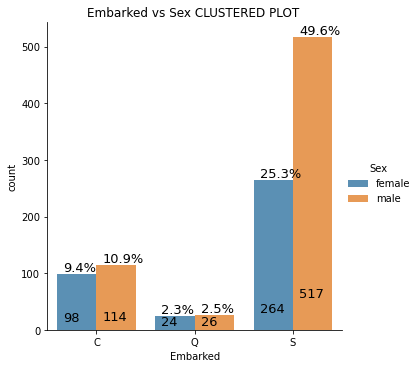

In [22]:
count_plot_2_catag_vlue("Embarked","Sex",df_final,box=False)

>**observation** we can say that 
* from 386 female passenger
  * 264  &emsp;did Embarke from  S-Southampton port &ensp;25% from the original data
  * 24 &ensp;&emsp;did Embarke from  Q-Queenstown port    &emsp;2% from the original data
  * 98 &ensp;&emsp;did Embarke from  C-Cherbourg   port   &emsp;&emsp;9% from the original data<br> 
* from 657 male passenger
  * 517  &emsp;did Embarke from  S-Southampton port &ensp;50% from the original data
  * 26 &ensp;&emsp;did Embarke from  Q-Queenstown port    &emsp;2% from the original data
  * 114 &ensp;&ensp;did Embarke from  C-Cherbourg   port   &emsp;&emsp;11% from the original data

#### 3.2.2 EMBARKED VS SURVIVED

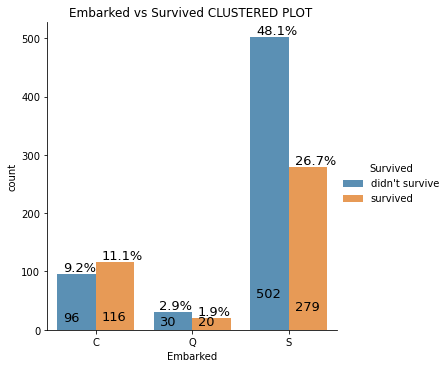

In [23]:
count_plot_2_catag_vlue("Embarked","Survived",df_final,box=False)

>**observation** we can say that 
* from 628  passenger that did not survive
  * 502  &emsp;did Embarke from  S-Southampton port &ensp;27% from the original data
  * 30 &ensp;&emsp;did Embarke from  Q-Queenstown port    &emsp;3% from the original data
  * 96 &ensp;&emsp;did Embarke from  C-Cherbourg   port   &emsp;&emsp;9% from the original data<br> 
* from 415 passenger that did  survive
  * 279  &emsp;did Embarke from  S-Southampton port &ensp;27% from the original data
  * 20 &ensp;&emsp;did Embarke from  Q-Queenstown port    &emsp;2% from the original data
  * 116 &ensp;&ensp;did Embarke from  C-Cherbourg   port   &emsp;&emsp;11% from the original data
  
  


## 3.3 MULTIVARIATE EXPLORATION
In this section, we will use multivariate exploration methods to see if there are patterns between the Embarked vs Sex, Survived
because in the previous section saw that the most common port was  S-Southampton for both Sex, Survived column
In this section, we want to know from all the passenger that embarked  from  S-Southampton  what gender is most survived  also the gneder for the passenger that didn't survive and the common age range for both and the family size 

### 3.3.1 WHAT IS THE MOST COMMON GENDER FOR PASSENGER THAT SURVIVED AND DID NOT SURVIVE WITH RESPECT TO HE/SHE DID EMBARK FROM S-SOUTHAMPTON?

C:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Sex vs Embarked vs Survived')

<Figure size 1440x1440 with 0 Axes>

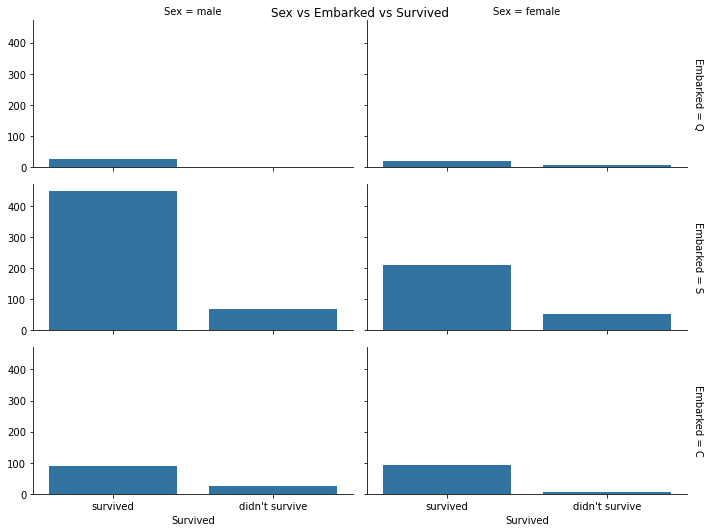

In [24]:
plt.figure(figsize=[20,20])
g = sb.FacetGrid(data = df_final, col = 'Sex', row = 'Embarked', size = 2.5,aspect=2,margin_titles = True)
g.map(sb.countplot,"Survived").add_legend()
g.fig.suptitle('Sex vs Embarked vs Survived')

>**observation** we can say that the most common port for the passengers to embark from despite it is gender male or female and had higher survival and didn't survive rate is S-Southampton port,

we will use `uni_count_plot` to get the count and percentage for 
* the male passenger that survived and didn't survive and emparked from S-Southampton
* the female passenger that survived and didn't survive and emparked from S-Southampton

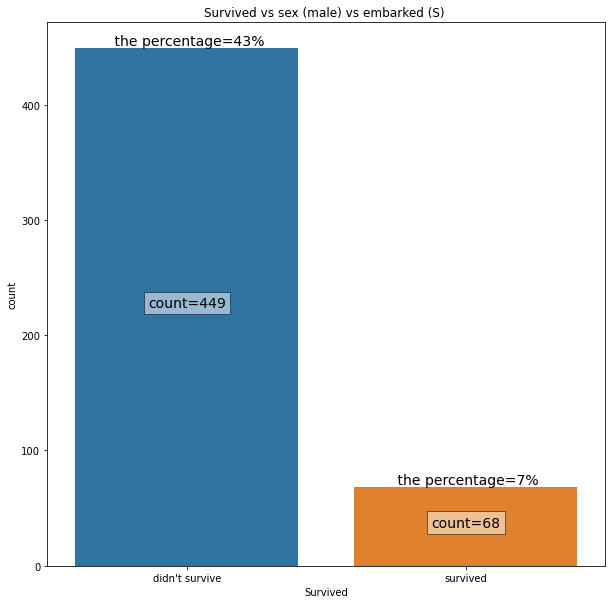

In [25]:
df_m_s=df_final[(df_final["Embarked"]=="S")&(df_final["Sex"]=="male")]#dataframe sex=male,embarked=S
uni_count_plot (df_m_s,'Survived',f"Survived vs sex (male) vs embarked (S) ")

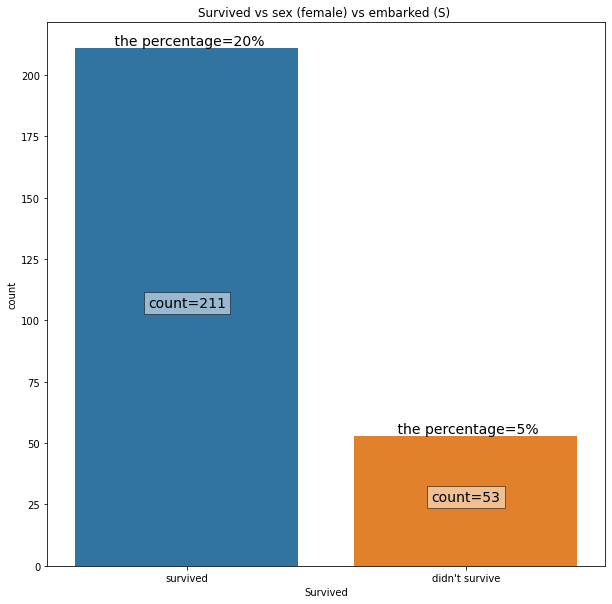

In [26]:
df_f_s=df_final[(df_final["Embarked"]=="S")&(df_final["Sex"]=="female")] #dataframe sex=male,embarked=S
uni_count_plot (df_f_s,'Survived',f"Survived vs sex (female) vs embarked (S) ")


> **observation**<br>
we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from :<br>
<br>
`50%  of the passenger were male` <br>
* 43% didn't survive
* 7%  did survive<br>

>`25%  of the passenger was female` <br>
* 5% didn't survive
* 20%  did survive<br>

<br>

>for genral (male and female togther)survived column and embarked from S-Southampton port <br>
`48% did not survive` <br>
`27% did survive` <br>


### 3.3.2 WHAT IS THE MOST COMMON AGE FOR THE FEMALE/MALE PASSENGER THAT SURVIVED AND DID NOT SURVIVE WITH RESPECT TO HE/SHE DID EMBARK FROM S-SOUTHAMPTON ? 
In this section, we want to investigate if there is a relation between age vs survived column vs sec vs emparked like:<br>
<br>
what is the most common age range for passenger that survived and didn't survive  for male and female passenger if they emparked from S-Southampton<br>
<br>
to  answer the above we will use the multivariate exploration method<br>

#### **3.3.2.1 Sex vs Survived=(survived ) vs Embarked vs Age**
in this section we will use the Multivariate Exploration Exploration to answer `what is the most common age range for passenger that survived and didn't survive  for male and female passenger if they emparked from S-Southampton` <br>
Sex vs Embarked Vs Survived column<br>
<br>
 we will see the age range for the passenger that survived with respect to if they are male or female and embarked from S-Southampton port
 <br>

Text(0.44, 1.07, 'Sex vs Embarked vs Survived vs Age')

<Figure size 1440x1440 with 0 Axes>

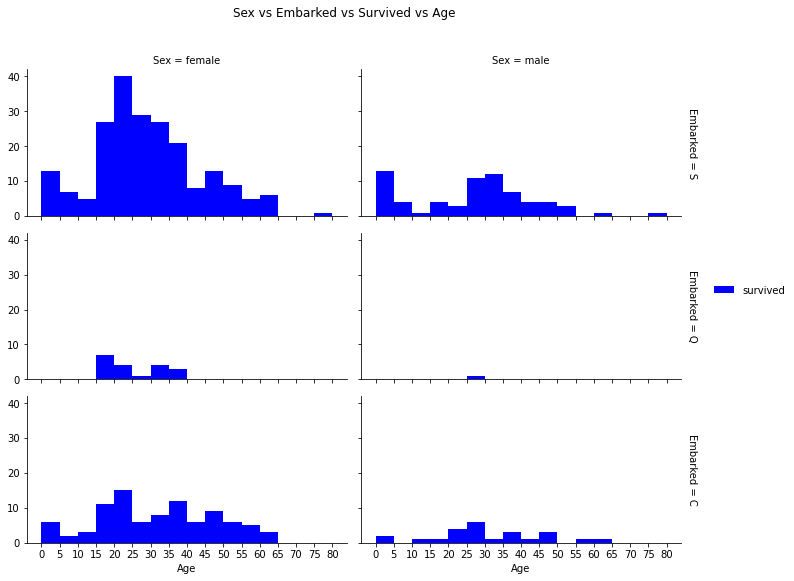

In [27]:
plt.figure(figsize=[20,20])
#dataframe with survived passenger only
df_Survived=df_final[df_final["Survived"]=="survived"]
bins=np.arange(0,df_final["Age"].max()+5,5)
g = sb.FacetGrid(data =df_Survived , col = 'Sex', row = 'Embarked', size = 2.5,aspect=2,margin_titles = True)
g.map(plt.hist,"Age",color="b",label="survived",bins=bins).add_legend()
plt.xticks(bins);
g.fig.suptitle(x=0.44,y=1.07,t='Sex vs Embarked vs Survived vs Age')

>**observation:**
we can say that the passenger that emparked from S-Southampton and was female and survived 
age range between 15-40 is the most common age range
we can say that the passenger that emparked from S-Southampton and was male and survived 
age range between 15-50 is the most common age range 

####  **3.3.2.2 Sex vs Survived=(didn't survive ) vs Embarked vs Age**
in this section, we will see the age range for the passenger that didn't survive with respect to if they are male or female and embarked from S-Southampton port

Text(0.44, 1.07, "Sex vs Embarked vs didn't Survive vs Age")

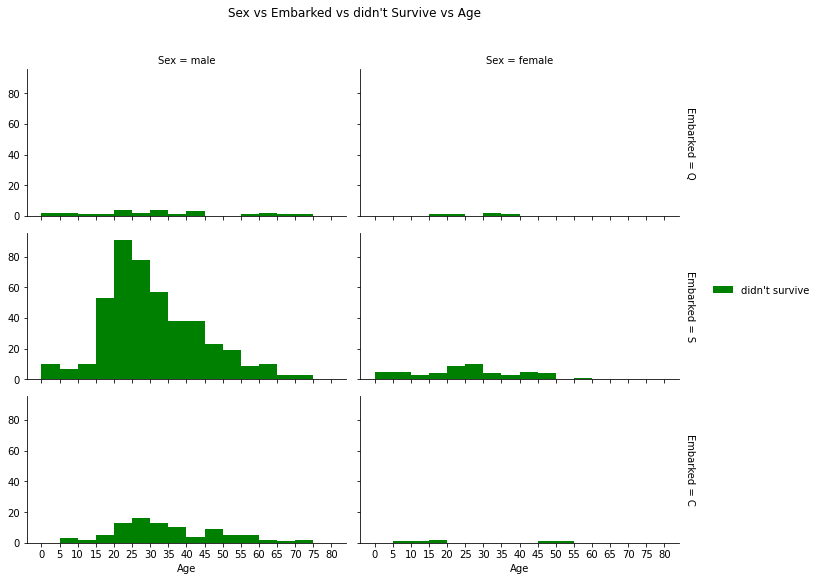

In [28]:
s = sb.FacetGrid(data =  df_final[df_final["Survived"]=="didn't survive"], col = 'Sex', row = 'Embarked', size = 2.5,aspect=2,margin_titles = True)
s.map(plt.hist,"Age",color="g",label="didn't survive",bins=bins)
s.add_legend()
plt.xticks(bins);
s.fig.suptitle(x=0.44,y=1.07,t="Sex vs Embarked vs didn't Survive vs Age")

##### >**observation:**<br>
<br>
we can say that the passenger that emparked from S-Southampton and was female and didn't survive <br>
age range between 2-50 is the most common age range<br>
<br>
we can say that the passenger that emparked from S-Southampton and was male and didn't survive<br>
age range between 15-55 is the most common age range <br>

## 3.4 WHAT IS THE MOST COMMON FAMILY NUMBER FOR THE FEMALE/MALE PASSENGER THAT SURVIVED AND DID NOT SURVIVE WITH RESPECT TO IF HE/SHE DID EMBARK FROM S-SOUTHAMPTON PORT?

in this section, we will use multivariate exploration to get the  number of a family member for male / female passenger  that embarked from S-Southampton


Text(0.49, 1.07, 'Sex vs Embarked vs Survived vs Family')

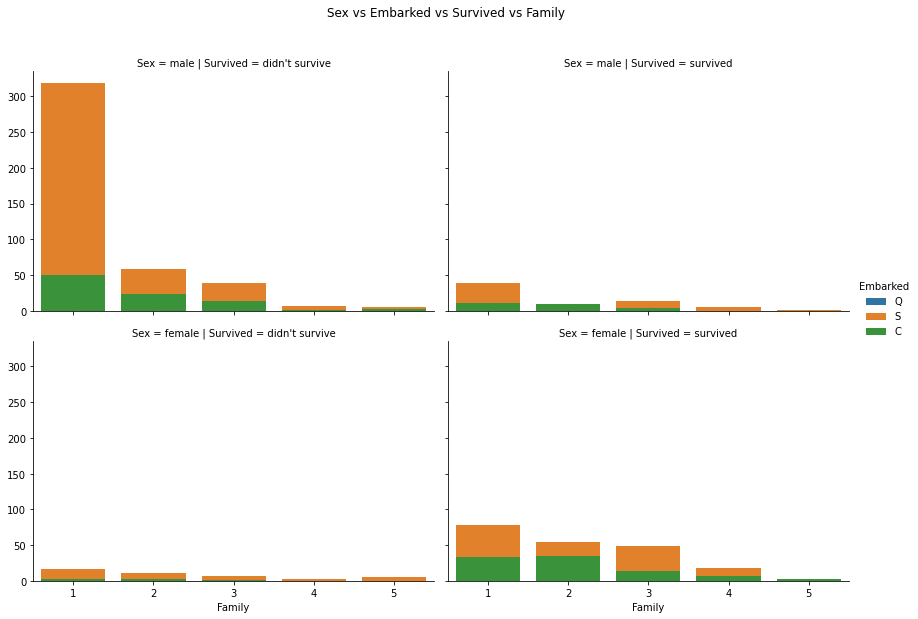

In [29]:
G=sb.FacetGrid(data=df_final,col="Survived",row="Sex",hue="Embarked",size=4,aspect=1.5)
G=G.map(sb.countplot,"Family")
G.add_legend()
G.fig.suptitle(x=0.49,y=1.07,t='Sex vs Embarked vs Survived vs Family')

>**observation**<br>
<br>
**we can say that the most common family size  passenger that emparked from S-Southampton and was female :<br>
 * survived: 1 to 4 family members<br>
 * didn't survive:  1 to 5 family members<br>
<br>

>we can say that family size  passenger that emparked from S-Southampton and was male :<br>
<br>
* survived: 1,3,4 family members<br>
* didn't survive:  1 to 4 family members<br>


#  4.CONCLUSION<br>
we can say that from 74% of the people that emparked form S-Southampton which is the most port that the passenger embarked from :<br>
<br>
`50%  of the passenger were male` <br>
* 43% didn't survive
  * most common age range is 15-55
  * family size form 1 to 4 members
* 7%  did survive<br>
  * most common age range is 15-50
  * family size 1 ,3, 4 members


`25%  of the passenger was female` <br>
* 5% didn't survive
   * most common age range is 2-50
   * family size form 1 to 5 members
* 20%  did survive<br>
   * most common age range is 15-40
   * family size form 1 to 4 members


<br>

for genral (male and female togther)survived column<br>
`48% did not survive` <br>
`27% did survive` <br>
<br>
we can say also:<br>
* the most common port for male and female passenger to embark from was  S-Southampton<br>
* the most common port that people emparked from did survive and did not was  S-Southampton<br>
* half of the passenger were men that embarked from the S-Southampton port with `50% percentage from our data` set<br>
* the most gender of the passengers that `didn't survive` and embarked form `S-Southampton port` were `male` with a `43%` percentage form all data set
* the most gender of the passengers that `did survive` and embarked form `S-Southampton` port were `female` with a `20%` percentage form all data set
* the most family size  that survived and didn't survive for both the female and male passenger was = 1 meaning by that the most affected people by survived and didn't survive rate was the solo passenger 